In [1]:
import pandas as pd

In [2]:
fake_df=pd.read_csv('Fake.csv')
real_df=pd.read_csv('True.csv')

In [3]:
fake_df = fake_df.head(10000)
real_df = real_df.head(10000)

In [4]:
fake_df['label'] = 1
real_df['label'] = 0

In [5]:
combined_df = pd.concat([fake_df, real_df], axis=0)

# Shuffle the combined dataset
# reset_index drops the old index and creates a new one
combined_df = combined_df.sample(frac=1).reset_index(drop=True)

In [6]:
combined_df.head()

,title,text,subject,date,label
0,"Wealthy, educated voters fuel Trump's East Coa...","WASHINGTON/BETHESDA, Md. (Reuters) - Wealthy, ...",politicsNews,"April 28, 2016",0
1,WATCH: GOP-Friendly PAC Creates SICKENING Lin...,A PAC that claims to support principled conse...,News,"June 18, 2017",1
2,WATCH: CNN Host Calls Out Trump Supporter For...,This election is already the nastiest one on r...,News,"October 28, 2016",1
3,The Ladies Of ‘The View’ Just HAMMERED Trump’...,With Donald Trump s clear and obvious racism o...,News,"June 6, 2016",1
4,U.S. Republicans in crisis over Trump's vulgar...,WASHINGTON/ST. LOUIS (Reuters) - The U.S. Repu...,politicsNews,"October 9, 2016",0


In [7]:
import nltk
nltk.download('punkt', download_dir='K:/sem 7 intership/venv/nltk_data')
nltk.download('stopwords', download_dir='K:/sem 7 intership/venv/nltk_data')
nltk.download('wordnet', download_dir='K:/sem 7 intership/venv/nltk_data')
nltk.download('omw-1.4', download_dir='K:/sem 7 intership/venv/nltk_data')

[nltk_data] Downloading package punkt to K:/sem 7
[nltk_data]     intership/venv/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to K:/sem 7
[nltk_data]     intership/venv/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to K:/sem 7
[nltk_data]     intership/venv/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to K:/sem 7
[nltk_data]     intership/venv/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [8]:
import re
import nltk
nltk.data.path.append('K:/sem 7 intership/venv/nltk_data')
nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer



[nltk_data] Downloading package punkt_tab to K:\sem 7
[nltk_data]     intership\venv\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [9]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(tokens)


In [10]:
combined_df['text'] = combined_df['text'].apply(clean_text)
combined_df.head()

,title,text,subject,date,label
0,"Wealthy, educated voters fuel Trump's East Coa...",washingtonbethesda md reuters wealthy welleduc...,politicsNews,"April 28, 2016",0
1,WATCH: GOP-Friendly PAC Creates SICKENING Lin...,pac claim support principled conservative cand...,News,"June 18, 2017",1
2,WATCH: CNN Host Calls Out Trump Supporter For...,election already nastiest one record american ...,News,"October 28, 2016",1
3,The Ladies Of ‘The View’ Just HAMMERED Trump’...,donald trump clear obvious racism wanting judg...,News,"June 6, 2016",1
4,U.S. Republicans in crisis over Trump's vulgar...,washingtonst louis reuters u republican party ...,politicsNews,"October 9, 2016",0


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Features and labels
X = combined_df['text']
y = combined_df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Improved pipeline: TF-IDF with bigrams + stopwords, Logistic Regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=15000, ngram_range=(1,2), stop_words='english', min_df=2)),
    ('clf', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

# Train the model
pipeline.fit(X_train, y_train)


,steps,"[('tfidf', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


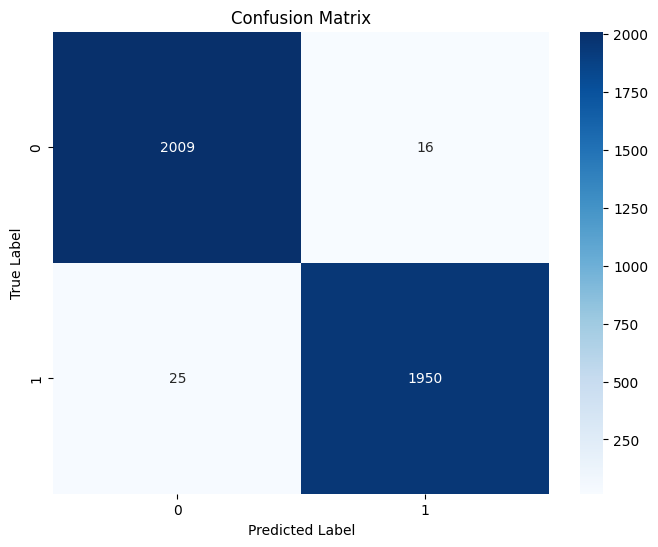

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2025
           1       0.99      0.99      0.99      1975

    accuracy                           0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000



In [20]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict
y_pred = pipeline.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))


In [21]:
import joblib

joblib.dump(pipeline, 'fake_news_model.pkl')
print("Model saved as 'fake_news_model.pkl'")


Model saved as 'fake_news_model.pkl'
